In [1]:
import numpy as np
import pandas as pd
# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display as ipd

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [2]:
audio_path = "data/audio/bonjour/bonjour_mykhaylo_01.wav"

# or uncomment the line below and point it at your favorite song:
#
# audio_path = '/path/to/your/favorite/song.mp3'

y, sr = librosa.load(audio_path)

In [3]:
def spectrogram(y, sr):
    # Let's make and display a mel-scaled power (energy-squared) spectrogram
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

    # Convert to log scale (dB). We'll use the peak power (max) as reference.
    log_S = librosa.power_to_db(S, ref=np.max)

    # Make a new figure
    plt.figure(figsize=(12,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

    # Put a descriptive title on the plot
    plt.title('mel power spectrogram')

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()

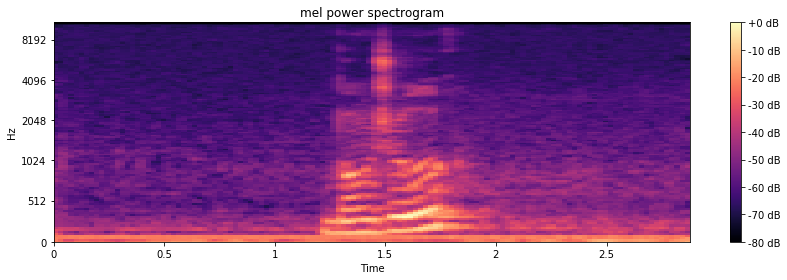

In [4]:
spectrogram(y,sr)

In [5]:
def trimClip(y,sr):
    plt.figure(1)
    librosa.display.waveplot(y, sr=sr)
    # Trim the beginning and ending silence
    yt, index = librosa.effects.trim(y, top_db=10)
    # Print the durations
    print(librosa.get_duration(y), librosa.get_duration(yt))
    plt.figure(2)
    librosa.display.waveplot(yt, sr=sr)
    spectrogram(yt,sr)
    return (yt,sr)

1.7298866213151927 0.37151927437641724


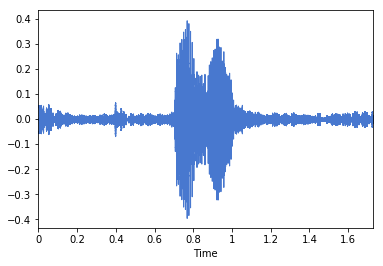

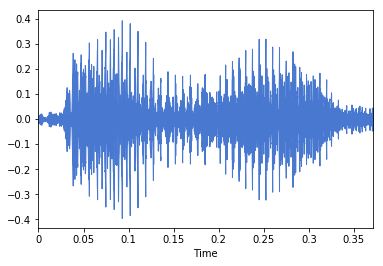

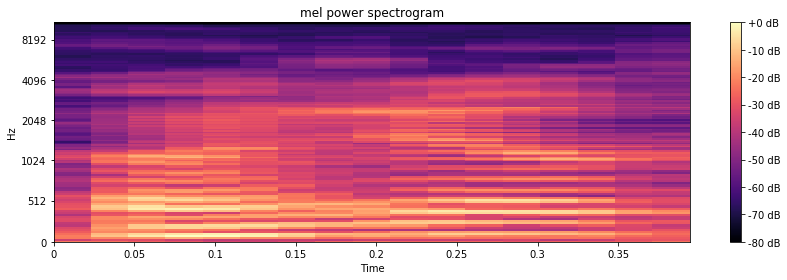

In [6]:
# Load some audio
y, sr = librosa.load("data/audio/bonjour/bonjour_narek_01.wav")
y1, sr1 = trimClip(y,sr)

In [7]:
def trimClip(y,sr):
    yt, index = librosa.effects.trim(y, top_db=11)
    return (yt,sr)

In [8]:
def show(y, sr):
    plt.figure(figsize=(12,4))
    librosa.display.waveplot(y, sr=sr)
    spectrogram(y, sr)
    ipd.display(ipd.Audio(y, rate=sr))

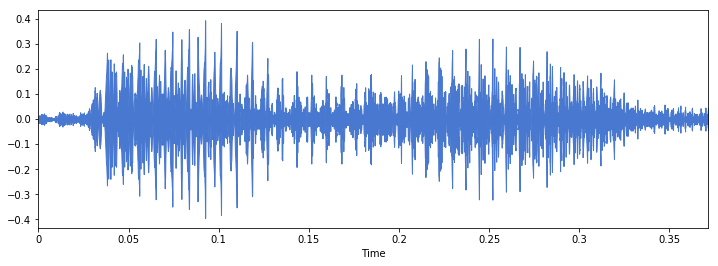

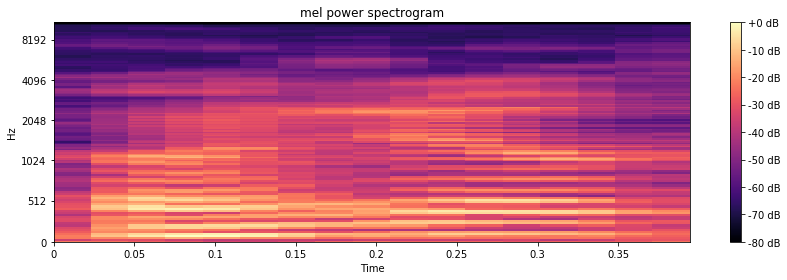

In [9]:
show(y1,sr)